In [12]:
import os
import glob
import soundfile as sf
import librosa
import audio_utils
import pandas as pd

In [13]:
schoollist = glob.glob('/vol/tensusers2/wharmsen/letterster-corpus/round2/dmt-reading/01_audio_raw/*')

audioDict = {}
for school in schoollist:
    filelist = glob.glob(school + '/*')
    schoolID = os.path.basename(school)
    if schoolID != 'prompts':
        audioDict[schoolID] = filelist

print(audioDict)

{'101': ['/vol/tensusers2/wharmsen/letterster-corpus/round2/dmt-reading/01_audio_raw/101/4010103_kaart1_juni24.WMA', '/vol/tensusers2/wharmsen/letterster-corpus/round2/dmt-reading/01_audio_raw/101/4010103_kaart2_juni24.WMA', '/vol/tensusers2/wharmsen/letterster-corpus/round2/dmt-reading/01_audio_raw/101/4010103_kaart3_juni24.WMA', '/vol/tensusers2/wharmsen/letterster-corpus/round2/dmt-reading/01_audio_raw/101/4010111_kaart1_juni24.WMA', '/vol/tensusers2/wharmsen/letterster-corpus/round2/dmt-reading/01_audio_raw/101/4010111_kaart2_juni24.WMA', '/vol/tensusers2/wharmsen/letterster-corpus/round2/dmt-reading/01_audio_raw/101/4010111_kaart3_juni24.WMA', '/vol/tensusers2/wharmsen/letterster-corpus/round2/dmt-reading/01_audio_raw/101/4010112_kaart1_juni24.WMA', '/vol/tensusers2/wharmsen/letterster-corpus/round2/dmt-reading/01_audio_raw/101/4010112_kaart2_juni24.WMA', '/vol/tensusers2/wharmsen/letterster-corpus/round2/dmt-reading/01_audio_raw/101/4010112_kaart3_juni24.WMA', '/vol/tensusers2/wh

/vol/tensusers5/wharmsen/virenv-wav2vec2/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/vol/tensusers5/wharmsen/virenv-wav2vec2/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/vol/tensusers5/wharmsen/virenv-wav2vec2/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/vol/tensusers5/wharmsen/virenv-wav2vec2/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/vol/tensusers5/wharmsen/virenv-wav2vec2/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/vol/tensusers5/wharmsen/virenv-wav2vec2/lib/python3.10/site

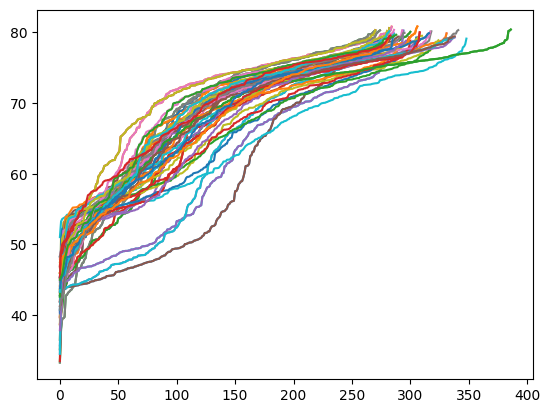

In [22]:
metadataList = []
for school in audioDict.keys():
    for wmaFile in audioDict[school]:

        # Get basename
        filename = os.path.basename(wmaFile).replace('.WMA', '')

        # Get metadata
        # value = <value_if_true> if <expression> else <value_if_false>
        studentID = filename.split('_')[0]
        grade = 'groep5' if (studentID[0] == 4 or studentID[0] == '4') else 'groep6'
        card = filename.split('_')[1]
        card_version = 'A' if grade == 'groep6' else 'B' # IDs with 4 are groep 5; IDs with 5 are groep 6; In round 1, groep 5 reads card A and groep 6 reads card B; In round 2 it's the other way around.
        prompt = card + '_' + card_version
        date = filename.split('_')[2]
    
        # Read .WMA file
        y,sr = librosa.load(wmaFile, sr=16000)

        # Compute SNR
        noiseIntensity, signalIntensity, snr, sortedIntensityList, plot = audio_utils.computeSNR(y, sr, 0.25)
        metadataList.append([filename, school, studentID, grade, card, card_version, prompt, date, round(snr, 3)])

        # Write .WMA file as .wav file
        # sf.write(wmaFile.replace('.WMA', '.wav'), y, sr, subtype='PCM_24')

pd.DataFrame(metadataList, columns = ["filename", "school", "studentID", "grade", "card", "card_version", "prompt", "date", "snr"]).to_csv('recordings.tsv', sep='\t')


In [23]:
df = pd.DataFrame(metadataList, columns = ["filename", "school", "studentID", "grade", "card", "card_version", "prompt", "date", "snr"])
df['filename'] = df.apply(lambda x: x['filename'].replace('.wav', ''), axis=1)
df.drop_duplicates(subset='filename').set_index('filename').to_csv('./recordings.tsv', sep='\t')

In [27]:
from IPython.display import Audio
Audio(data=y, rate=sr)